<a href="https://colab.research.google.com/github/Raudhil/Machine-Learning-2025/blob/main/Jobsheet%2011/RAUDHIL_FIRDAUS_NAUFAL_JS11_Praktikum5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

Klasifikasi SVM dengan Data Dummy Linier



**Langkah 1 - Import Library**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Langkah 2 - Membuat Data Dummy**

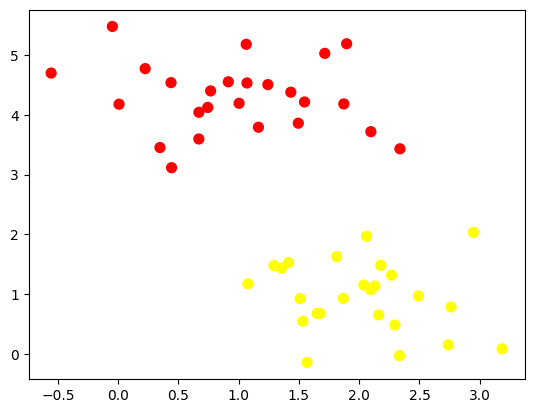

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Langkah 3 - Buat Ilustrasi Garis Pemisah**

**Langkah 4 - Ilustrasi Margin**

(-1.0, 3.5)

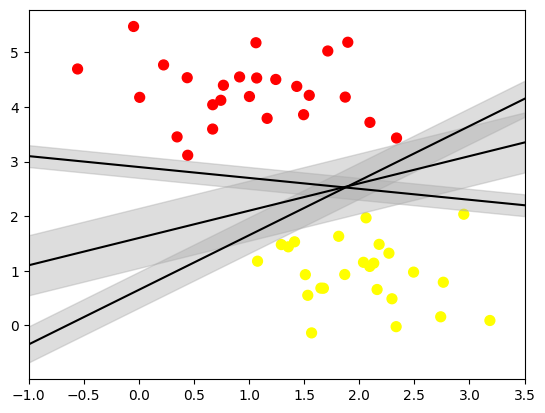

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**Langkah 5 - Fitting Model**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

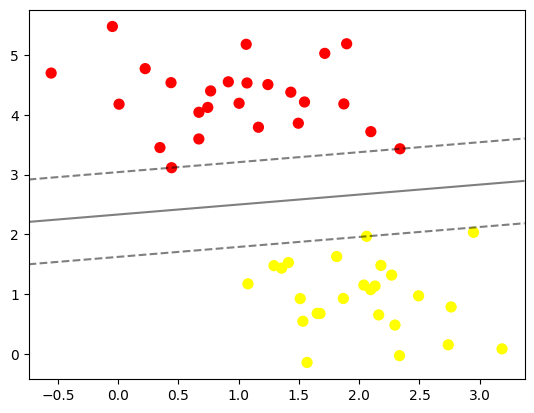

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

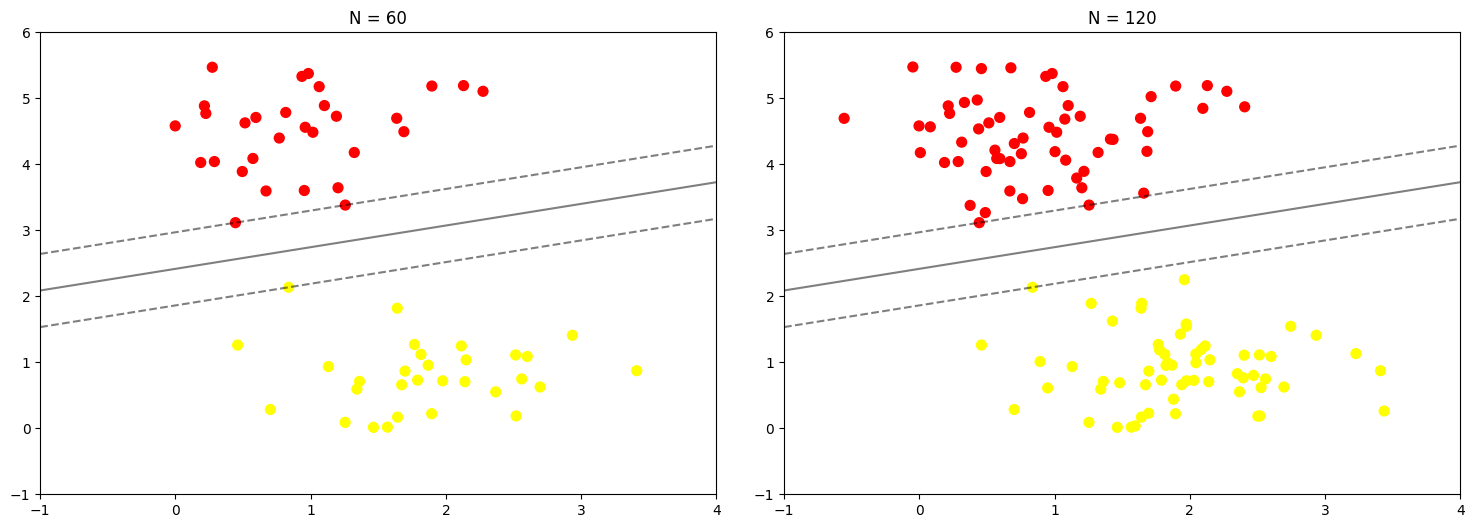

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00


In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# **Praktikum 2**

Klasifikasi SVM dengan Data Dummy Non-Linier



Langkah 1 - Ilustrasi Data Non-Linier


**Langkah 1a - Import Library**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

**Langkah 1b - Buat Kembali Fungsi Plotting**

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Langkah 1c - Buat Data Dummy Non-Linier**

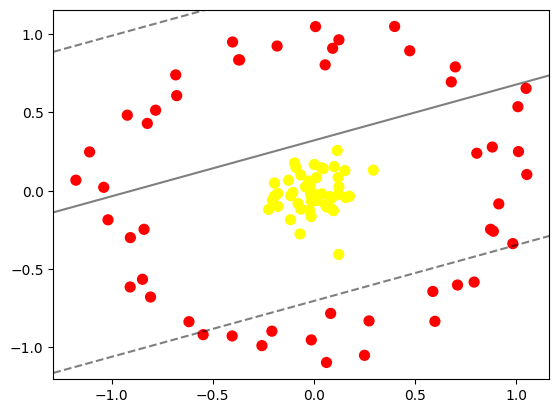

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = np.exp(-(X ** 2).sum(1)) # Define r as the squared radial distance
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.04600385,  0.14123365],
       [ 0.80523557,  0.2399125 ],
       [-0.80738863, -0.67858081],
       [-0.37181734,  0.83593644],
       [-0.04156744,  0.02503284],
       [ 0.12259088, -0.40660724],
       [ 0.27256504, -0.8309361 ],
       [ 0.0833481 , -0.11160455],
       [-0.06471774, -0.1169618 ],
       [-0.17861834, -0.0172705 ],
       [ 0.69905242,  0.79110742],
       [ 0.11523434,  0.25726958],
       [ 0.70987995, -0.60180361],
       [ 0.00813315,  1.04860543],
       [-0.0138211 , -0.02464424],
       [ 1.0112354 ,  0.25029412],
       [ 0.03809988, -0.01948327],
       [ 0.00541252, -0.02627701],
       [-0.06854858, -0.27532513],
       [-0.17843271, -0.09974243],
       [ 0.15678396, -0.04297396],
       [-0.01387506, -0.03168205],
       [-0.40415116, -0.92711992],
       [ 0.25019479, -1.05081298],
       [ 0.08866356, -0.04468993],
       [-0.20495849, -0.0595608 ],
       [ 0.06284421, -0.10310655],
       [ 0.07908264, -0.03764601],
       [-0.22405056, -0.11899036],
       [ 0.87324611, -0.24592367],
       [ 0.01428684, -0.062034  ],
       [ 0.67908976,  0.69542238],
       [ 0.12086861, -0.02113883],
       [-0.19552635, -0.03476353],
       [ 0.88174392,  0.27951617],
       [ 0.00183431,  0.16817772],
       [ 0.91380143, -0.08368193],
       [ 0.12343508,  0.02495039],
       [ 0.09269467,  0.91016306],
       [-0.01774116,  0.00587358],
       [-0.10436118, -0.01098118],
       [ 0.05710626, -0.08949178],
       [ 0.17586225, -0.03469552],
       [-0.90719466, -0.29908557],
       [-0.18187592,  0.924499  ],
       [-0.12567329,  0.06724749],
       [-0.54736757, -0.91906107],
       [ 0.15331953,  0.12880363],
       [ 0.06226261, -1.09657014],
       [ 0.79194681, -0.58303726],
       [-1.17640811,  0.06771103],
       [-0.19493381,  0.04950216],
       [-0.20764609, -0.89673253],
       [ 0.05568596,  0.80426239],
       [ 0.10049751,  0.15466284],
       [-0.02261992,  0.02021232],
       [ 0.08284539, -0.78323861],
       [-0.02229212, -0.12398222],
       [-0.01289585, -0.95253121],
       [-0.78232372,  0.51464559],
       [ 0.8870839 , -0.25835881],
       [-0.06502899,  0.10075114],
       [ 0.09619904, -0.1268196 ],
       [ 0.01274873,  0.08452756],
       [-0.61754648, -0.83610214],
       [ 0.59820757, -0.83373354],
       [-0.40199047,  0.95025196],
       [-0.11495411, -0.03113758],
       [ 0.587889  , -0.64293604],
       [ 0.29326709,  0.13194453],
       [-0.92229258,  0.48286606],
       [-0.01567798, -0.01745421],
       [-0.90815289, -0.61436668],
       [-1.10875233,  0.24816323],
       [-0.84719543, -0.56529734],
       [-0.11559224, -0.18489043],
       [-0.67813044,  0.6077218 ],
       [-0.82340716,  0.43038314],
       [-0.83956103, -0.24611128],
       [-1.03878427,  0.0222376 ],
       [ 1.04874914,  0.6541538 ],
       [ 0.1197994 ,  0.08549464],
       [-0.07878609, -0.0811922 ],
       [-0.68288823,  0.74028667],
       [ 0.03750237,  0.14692985],
       [ 0.1236483 ,  0.96425771],
       [-0.02652075,  0.06254582],
       [ 0.98316394, -0.33732393],
       [ 1.00841586,  0.53692937],
       [ 0.47371077,  0.89419316],
       [ 1.05234016,  0.10403878],
       [-0.01408944, -0.1642264 ],
       [ 0.3991374 ,  1.04939547],
       [-1.01770381, -0.1853928 ],
       [-0.09546192,  0.17770268],
       [-0.36717981,  0.83596766],
       [-0.08864487,  0.14918819],
       [-0.25689553, -0.98880115],
       [-0.01641699,  0.05689702],
       [-0.0114782 , -0.06947452]]), y=array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]))>

**Langkah 2 - Fitting Model**

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

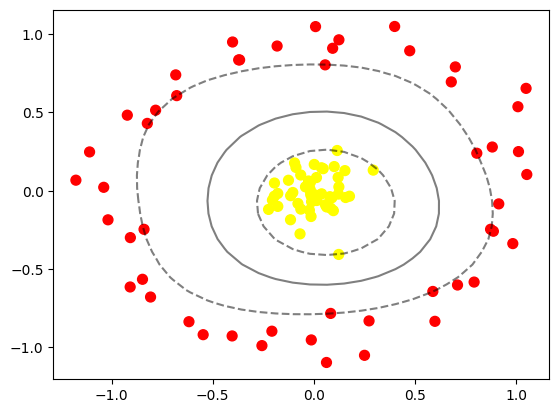

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# **Praktikum 3**

SVM Data Overlapping



**Langkah 1 - Import Library dan Buat Fungsi Plotting**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Langkah 2 - Buat Data Dummy**

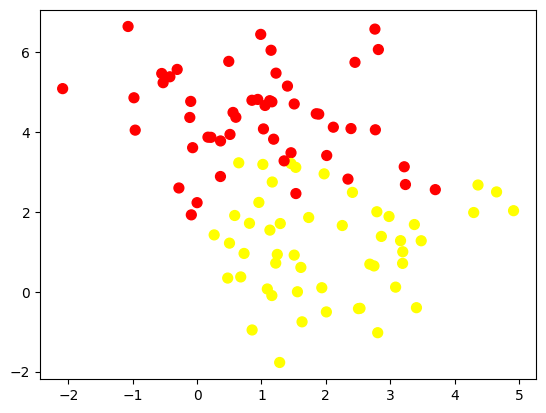

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Langkah 3 - Analisis Dampak Tunning**

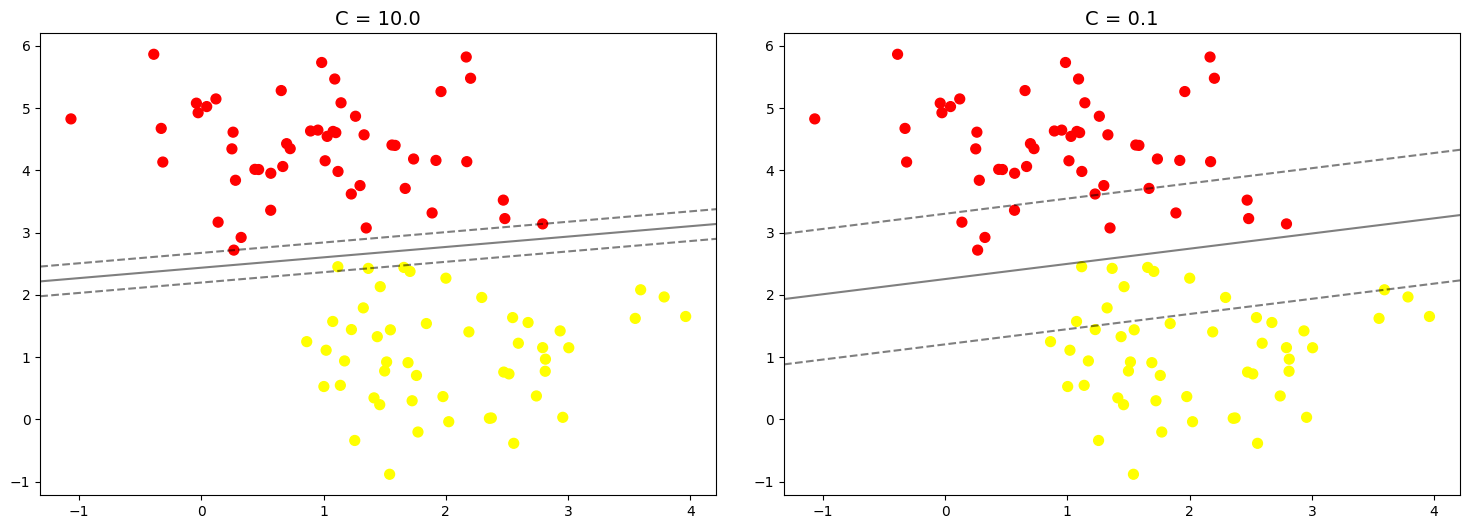

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# **Praktikum 4**

Klasifikasi Citra Wajah



**Langkah 0 - Unduh Dataset**

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


**Langkah 1 - Inspeksi Citra Wajah**

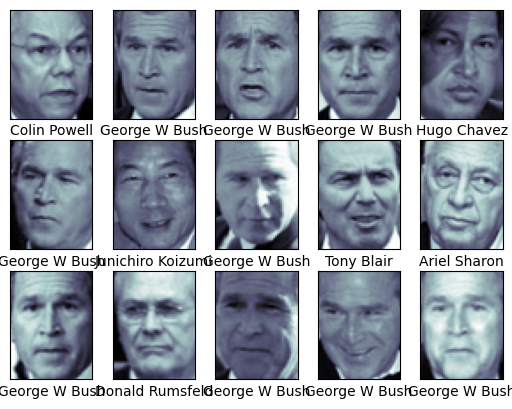

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

**Langkah 2 - Pra Pengolahan Data**

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

**Langkah 3 - Split Data**

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

**Langkah 4 - Pembuatan Model + Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 15s, sys: 416 ms, total: 2min 16s
Wall time: 1min 46s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

**Langkah 5 - Cek Hasil Prediksi**

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

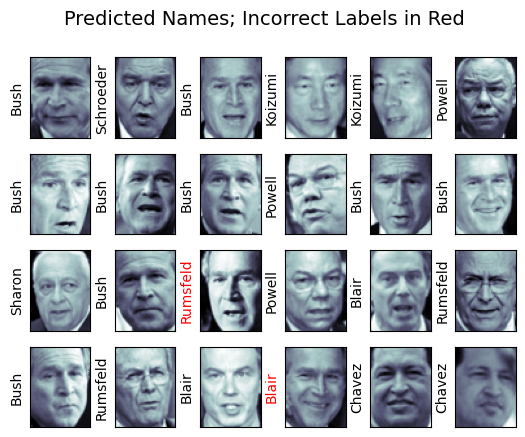

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

**Langkah 6 - Cek Performansi**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

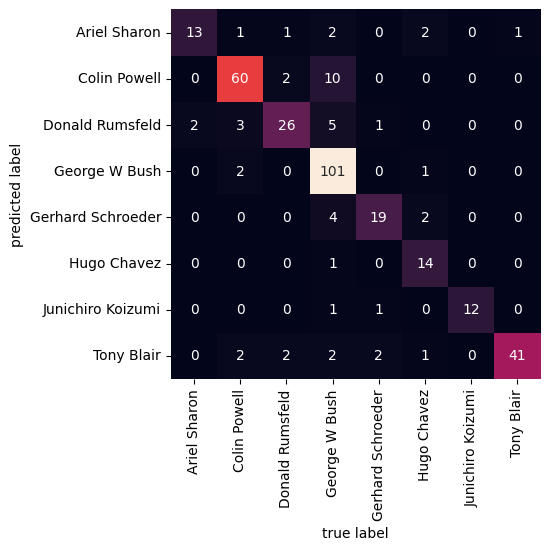

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **Praktikum 5**

Klasifikasi Citra Siang dan Malang



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Langkah 0 - Import Library**

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/images/images/training/"
test_dir = "/content/drive/MyDrive/images/images/test/"

**Langkah 1 - Load Data dan Visualisasikan**

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training




In [ ]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.




In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 57,  37,  26],
         [ 57,  37,  26],
         [ 57,  37,  26],
         ...,
         [ 71,  45,  32],
         [ 71,  45,  32],
         [ 71,  45,  32]],
 
        [[ 57,  37,  26],
         [ 57,  37,  26],
         [ 57,  37,  26],
         ...,
         [ 71,  45,  32],
         [ 71,  45,  32],
         [ 71,  45,  32]],
 
        [[ 57,  37,  26],
         [ 57,  37,  26],
         [ 57,  37,  26],
         ...,
         [ 71,  45,  32],
         [ 71,  45,  32],
         [ 71,  45,  32]],
 
        ...,
 
        [[198, 125,  84],
         [155,  91,  47],
         [140,  88,  40],
         ...,
         [117,  64,  20],
         [117,  64,  20],
         [117,  64,  20]],
 
        [[159,  91,  54],
         [194, 135,  95],
         [151, 107,  62],
         ...,
         [116,  63,  21],
         [116,  63,  21],
         [116,  63,  21]],
 
        [[187, 123,  87],
         [252, 197, 158],
         [223, 180, 138],
         ...,
         [116,  63,  21],
  

Cek ukuran gambar secara acak




In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 8
(469, 640, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar




In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak




Shape	: (458, 800, 3)
Label	: day


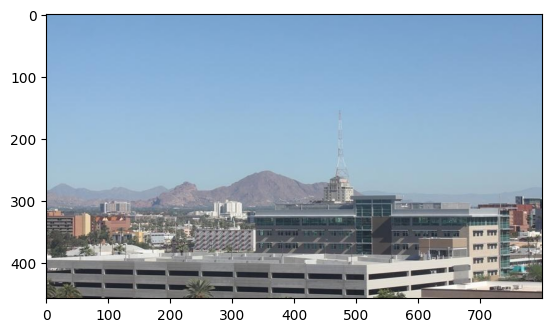

In [ ]:
random_img_viz(train_img)

**Langkah 3 - Pra Pengolahan Data**

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label.




In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.




In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Lakukan pra pengolahan data pada data training.




In [ ]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak.




In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 146
(600, 1100, 3)


# **Tugas Praktikum**


1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

  - Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

    - Gunakan model dengan kernel linier.

    - Gunakan model dengan kernel polynomial.

    - Gunakan model dengan kernel RBF.

  - Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/voice.csv')
print(df.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

In [ ]:
X_voice = df.drop('label', axis=1)
y_voice = df['label']

print("Features (X_voice) shape:", X_voice.shape)
print("Target (y_voice) shape:", y_voice.shape)

Features (X_voice) shape: (3168, 20)
Target (y_voice) shape: (3168,)


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable 'y_voice'
le = LabelEncoder()
y_voice_encoded = le.fit_transform(y_voice)

# Scale the features in X_voice
scaler = StandardScaler()
X_voice_scaled = scaler.fit_transform(X_voice)

print("Encoded target (y_voice_encoded) unique values:", np.unique(y_voice_encoded))
print("Scaled features (X_voice_scaled) shape:", X_voice_scaled.shape)

Encoded target (y_voice_encoded) unique values: [0 1]
Scaled features (X_voice_scaled) shape: (3168, 20)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Dictionary to store results
results = {}

print("Initialized results dictionary and imported necessary libraries.")

Initialized results dictionary and imported necessary libraries.


In [ ]:
split_ratios = {'70:30': 0.3, '80:20': 0.2}
kernels = ['linear', 'poly', 'rbf']

for name, test_size in split_ratios.items():
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_voice_scaled, y_voice_encoded, test_size=test_size, random_state=42)

    for kernel in kernels:
        # Train SVM model
        model = SVC(kernel=kernel, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        if name not in results:
            results[name] = {}
        results[name][kernel] = accuracy

# Convert results to a pandas DataFrame for tabular display
results_df = pd.DataFrame(results)

print("SVM Model Training and Evaluation Complete. Results:")
print(results_df.to_markdown(numalign="left", stralign="left"))

SVM Model Training and Evaluation Complete. Results:
|        | 70:30    | 80:20    |
|:-------|:---------|:---------|
| linear | 0.970557 | 0.976341 |
| poly   | 0.956887 | 0.968454 |
| rbf    | 0.981073 | 0.98265  |


In [ ]:
def extract_histogram_features(image):
    # Convert the image from RGB to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate histograms for H, S, and V channels
    # H (Hue): 0-179, S (Saturation): 0-255, V (Value): 0-255
    hist_h = cv2.calcHist([hsv], [0], None, [180], [0, 180])
    hist_s = cv2.calcHist([hsv], [1], None, [256], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [256], [0, 256])

    # Normalize histograms
    cv2.normalize(hist_h, hist_h)
    cv2.normalize(hist_s, hist_s)
    cv2.normalize(hist_v, hist_v)

    # Concatenate the histograms into a single feature vector
    features = np.concatenate((hist_h.flatten(), hist_s.flatten(), hist_v.flatten()))

    return features

print("Histogram feature extraction function defined.")

Histogram feature extraction function defined.


In [ ]:
X_img_features = []
y_img_labels = []

for img_data, label in train_std_img_list:
    features = extract_histogram_features(img_data)
    X_img_features.append(features)
    y_img_labels.append(label)

X_img_features = np.array(X_img_features)
y_img_labels = np.array(y_img_labels)

# Split data with 80:20 ratio
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(X_img_features, y_img_labels, test_size=0.2, random_state=42)

print("Image features extracted and data split into training and testing sets.")
print(f"X_train_img shape: {X_train_img.shape}")
print(f"y_train_img shape: {y_train_img.shape}")
print(f"X_test_img shape: {X_test_img.shape}")
print(f"y_test_img shape: {y_test_img.shape}")

Image features extracted and data split into training and testing sets.
X_train_img shape: (192, 692)
y_train_img shape: (192,)
X_test_img shape: (48, 692)
y_test_img shape: (48,)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid_img = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1]
}

# Initialize the SVC model with RBF kernel
svc_model = SVC(kernel='rbf', random_state=42)

# Initialize GridSearchCV
grid_search_img = GridSearchCV(svc_model, param_grid_img, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
%time grid_search_img.fit(X_train_img, y_train_img)

print("Hyperparameter tuning complete.")
print(f"Best parameters: {grid_search_img.best_params_}")
print(f"Best cross-validation score: {grid_search_img.best_score_:.4f}")

CPU times: user 160 ms, sys: 19 ms, total: 179 ms
Wall time: 5.73 s
Hyperparameter tuning complete.
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 1.0000


In [ ]:
best_svc_model = grid_search_img.best_estimator_
y_pred_img = best_svc_model.predict(X_test_img)

final_accuracy_img = accuracy_score(y_test_img, y_pred_img)

print("Final Image Classification Model Performance:")
print(f"Best Hyperparameters: {grid_search_img.best_params_}")
print(f"Test Accuracy: {final_accuracy_img:.4f}")

Final Image Classification Model Performance:
Best Hyperparameters: {'C': 10, 'gamma': 0.1}
Test Accuracy: 1.0000
